In [32]:
# matplotlib kernel
import pandas as pd
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
os.getcwd()

'/Users/claireleblanc/Documents/grad_school/staller_lab/Data'

In [4]:
mcherry = pd.read_csv("PADI_mCherrynamesandscores.csv", index_col=0)
# mcherry["prot_seq"] = [str(Seq(seq).translate()) for seq in mcherry["AD"]]
# mcherry = mcherry.drop(["0","1","2","3","AD"], axis=1)
# mcherry.columns = ["BC","abundance","aa_seq"]
mcherry

,ADScore,Lib,ScaleScore
Name,,,
AT1G01010.1_1,NaN,mCherry,NaN
AT1G01010.1_101,44.137613,mCherry,-1.318123
AT1G01010.1_11,116.821370,mCherry,1.659127
AT1G01010.1_111,49.532073,mCherry,-1.097156
AT1G01010.1_121,50.843893,mCherry,-1.043422
...,...,...,...
SlARF9b_MR_81,30.923857,mCherry,-1.859381
SlARF9b_MR_91,53.150000,mCherry,-0.948960
VP16C_0,90.606843,mCherry,0.585336


In [9]:
len(set(mcherry.index))

70039

In [6]:
name_seq_data = pd.read_excel("PADI_names_sequences.xlsx")
name_seq_data

,Sub Library,Fragment Name,Fragment Sequence,Gene Model,ATG Number,Start Position,PADI Score,TF Family,Mean Disorder,AD Subtype,...,CountN,CountP,CountQ,CountR,CountS,CountT,CountV,CountW,CountY,Aromatics
0,Lib1,AT1G01010.1_1,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,AT1G01010.1,AT1G01010,1,1.004699,NAC,0.254442,1.0,...,3,1,1,3,2,1,5,0,1,5
1,Lib1,AT1G01010.1_11,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,AT1G01010.1,AT1G01010,11,0.575876,NAC,0.131235,NaN,...,5,2,0,2,3,1,4,1,2,6
2,Lib1,AT1G01010.1_21,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,AT1G01010.1,AT1G01010,21,-0.300407,NAC,0.104265,NaN,...,4,1,1,4,5,1,3,1,2,6
3,Lib1,AT1G01010.1_31,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,AT1G01010.1,AT1G01010,31,0.105372,NAC,0.105342,NaN,...,2,1,1,5,5,0,3,2,3,9
4,Lib1,AT1G01010.1_41,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,AT1G01010.1,AT1G01010,41,-0.167147,NAC,0.240860,NaN,...,5,1,2,6,5,1,0,2,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69568,Lib10,ATMG00940.1_91,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,ATMG00940.1,ATMG00940,91,-0.139281,Other,0.084480,NaN,...,0,1,1,2,4,4,4,2,0,5
69569,Lib10,ATMG00940.1_101,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,ATMG00940.1,ATMG00940,101,-0.064551,Other,0.104625,NaN,...,0,1,2,2,3,6,2,2,2,7
69570,Lib10,ATMG00940.1_111,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,ATMG00940.1,ATMG00940,111,-0.410777,Other,0.159452,NaN,...,1,2,2,3,4,5,2,3,2,7
69571,Lib10,ATMG00940.1_121,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,ATMG00940.1,ATMG00940,121,0.329820,Other,0.204375,NaN,...,1,4,2,3,4,4,1,3,3,10


In [51]:
ratio_data = name_seq_data[["Fragment Sequence","PADI Score"]]
ratio_data.columns = ["aa_seq", "ratio"]
ratio_data.to_csv("PADI_ratio_data_wrangled.csv")

In [26]:
mcherry_w_seq_adscore = name_seq_data.merge(mcherry, left_on="Fragment Name", right_index=True)[["Fragment Sequence", "ADScore"]]
mcherry_w_seq_scalescore = name_seq_data.merge(mcherry, left_on="Fragment Name", right_index=True)[["Fragment Sequence", "ScaleScore"]]

mcherry_w_seq_adscore.columns = ["aa_seq", "abundance"]
mcherry_w_seq_scalescore.columns = ["aa_seq", "abundance"]

In [20]:
gfp = pd.read_csv("PADI_GFPnamesandscores.csv", index_col=0)
gfp

,ADScore,Lib,ScaleScore
Name,,,
AT1G01010.1_1,NaN,GFP,NaN
AT1G01010.1_101,1.800000,GFP,-1.154050
AT1G01010.1_11,NaN,GFP,NaN
AT1G01010.1_111,2.203953,GFP,-0.690702
AT1G01010.1_121,2.556143,GFP,-0.286727
...,...,...,...
SlARF9b_MR_81,1.930607,GFP,-1.004240
SlARF9b_MR_91,NaN,GFP,NaN
VP16C_0,4.733250,GFP,2.210492


In [25]:
gfp_w_seq_adscore = name_seq_data.merge(gfp, left_on="Fragment Name", right_index=True)[["Fragment Sequence", "ADScore"]]
gfp_w_seq_scalescore = name_seq_data.merge(gfp, left_on="Fragment Name", right_index=True)[["Fragment Sequence", "ScaleScore"]]

gfp_w_seq_adscore.columns = ["aa_seq", "activity"]
gfp_w_seq_scalescore.columns = ["aa_seq", "activity"]

In [42]:
mcherry_gfp_PADI = name_seq_data.merge(mcherry, left_on="Fragment Name", right_index=True).merge(gfp, left_on="Fragment Name", right_index=True)
mcherry_gfp_PADI

,Sub Library,Fragment Name,Fragment Sequence,Gene Model,ATG Number,Start Position,PADI Score,TF Family,Mean Disorder,AD Subtype,...,CountV,CountW,CountY,Aromatics,ADScore_x,Lib_x,ScaleScore_x,ADScore_y,Lib_y,ScaleScore_y
0,Lib1,AT1G01010.1_1,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,AT1G01010.1,AT1G01010,1,1.004699,NAC,0.254442,1.0,...,5,0,1,5,NaN,mCherry,NaN,NaN,GFP,NaN
1,Lib1,AT1G01010.1_11,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,AT1G01010.1,AT1G01010,11,0.575876,NAC,0.131235,NaN,...,4,1,2,6,116.821370,mCherry,1.659127,NaN,GFP,NaN
2,Lib1,AT1G01010.1_21,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,AT1G01010.1,AT1G01010,21,-0.300407,NAC,0.104265,NaN,...,3,1,2,6,119.407486,mCherry,1.765059,2.139619,GFP,-0.764495
3,Lib1,AT1G01010.1_31,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,AT1G01010.1,AT1G01010,31,0.105372,NAC,0.105342,NaN,...,3,2,3,9,57.726857,mCherry,-0.761484,2.009344,GFP,-0.913925
4,Lib1,AT1G01010.1_41,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,AT1G01010.1,AT1G01010,41,-0.167147,NAC,0.240860,NaN,...,0,2,3,9,68.588378,mCherry,-0.316578,2.250430,GFP,-0.637390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69568,Lib10,ATMG00940.1_91,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,ATMG00940.1,ATMG00940,91,-0.139281,Other,0.084480,NaN,...,4,2,0,5,82.104793,mCherry,0.237077,2.778634,GFP,-0.031522
69569,Lib10,ATMG00940.1_101,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,ATMG00940.1,ATMG00940,101,-0.064551,Other,0.104625,NaN,...,2,2,2,7,52.669874,mCherry,-0.968627,2.185097,GFP,-0.712330
69570,Lib10,ATMG00940.1_111,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,ATMG00940.1,ATMG00940,111,-0.410777,Other,0.159452,NaN,...,2,3,2,7,86.482637,mCherry,0.416401,1.951123,GFP,-0.980707
69571,Lib10,ATMG00940.1_121,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,ATMG00940.1,ATMG00940,121,0.329820,Other,0.204375,NaN,...,1,3,3,10,103.355376,mCherry,1.107537,3.239086,GFP,0.496633


Text(0.5, 0, 'PADI score')

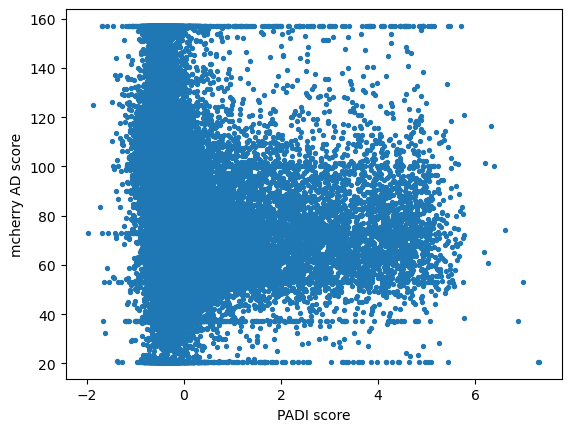

In [50]:
plt.scatter(mcherry_gfp_PADI["PADI Score"], mcherry_gfp_PADI["ADScore_x"], s=8)
plt.ylabel("mcherry AD score")
plt.xlabel("PADI score")

Text(0.5, 0, 'PADI score')

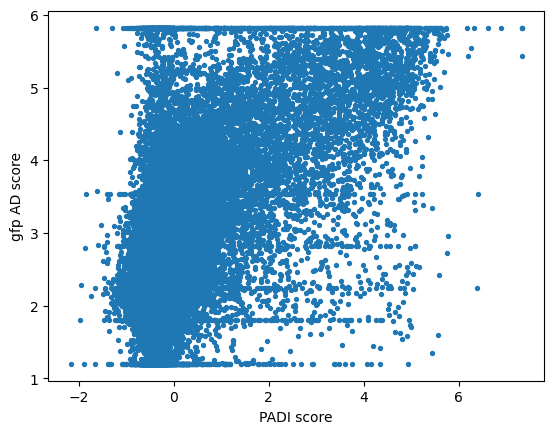

In [49]:
plt.scatter(mcherry_gfp_PADI["PADI Score"], mcherry_gfp_PADI["ADScore_y"], s=8)
plt.ylabel("gfp AD score")
plt.xlabel("PADI score")

Text(0.5, 0, 'PADI score')

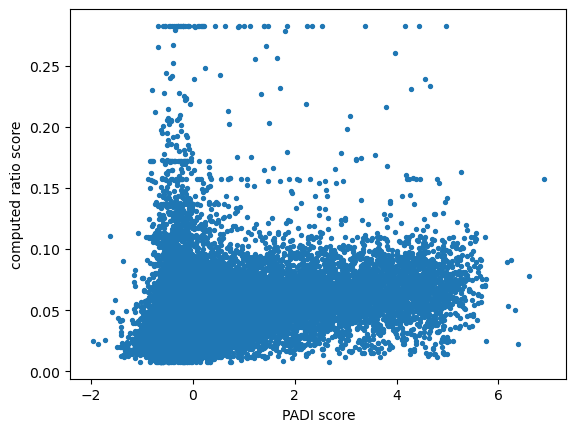

In [48]:
plt.scatter(mcherry_gfp_PADI["PADI Score"], mcherry_gfp_PADI["ADScore_y"]/mcherry_gfp_PADI["ADScore_x"], s=8)
plt.ylabel("computed ratio score")
plt.xlabel("PADI score")

In [28]:
adscore_df = mcherry_w_seq_adscore.merge(gfp_w_seq_adscore, on=["aa_seq"]).dropna()
adscore_df

,aa_seq,abundance,activity
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,119.407486,2.139619
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,57.726857,2.009344
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,68.588378,2.250430
5,RFQSKYKSRDAMWYFFSRRENNKGNRQSRTTVSGKWKLTG,71.863085,2.641251
6,AMWYFFSRRENNKGNRQSRTTVSGKWKLTGESVEVKDQWG,71.389912,3.081572
...,...,...,...
69521,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,82.104793,2.778634
69522,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,52.669874,2.185097
69523,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,86.482637,1.951123
69524,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,103.355376,3.239086


In [29]:
scalescore_df = mcherry_w_seq_scalescore.merge(gfp_w_seq_scalescore, on=["aa_seq"]).dropna()
scalescore_df

,aa_seq,abundance,activity
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,1.765059,-0.764495
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,-0.761484,-0.913925
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.316578,-0.637390
5,RFQSKYKSRDAMWYFFSRRENNKGNRQSRTTVSGKWKLTG,-0.182440,-0.189105
6,AMWYFFSRRENNKGNRQSRTTVSGKWKLTGESVEVKDQWG,-0.201822,0.315959
...,...,...,...
69521,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,0.237077,-0.031522
69522,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,-0.968627,-0.712330
69523,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,0.416401,-0.980707
69524,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,1.107537,0.496633


In [30]:
scalescore_df.to_csv("PADI_ScaleScore_data_wrangled.csv")
adscore_df.to_csv("PADI_ADScore_data_wrangled.csv")

In [33]:
# Should I split into train and test split right now???

# Shuffle data
scalescore_df = scalescore_df.iloc[np.random.default_rng(seed=25).permutation(len(scalescore_df))]
adscore_df = adscore_df.iloc[np.random.default_rng(seed=25).permutation(len(adscore_df))]

val_scalescore_df = scalescore_df[:int(.2*len(scalescore_df))]
train_scalescore_df = scalescore_df[int(.2*len(scalescore_df)):]

val_adscore_df = adscore_df[:int(.2*len(adscore_df))]
train_adscore_df = adscore_df[int(.2*len(adscore_df)):]

In [34]:
train_scalescore_df.to_csv("PADI_ScaleScore_data_wrangled_training.csv")
val_scalescore_df.to_csv("PADI_ScaleScore_data_wrangled_validation.csv")

train_adscore_df.to_csv("PADI_ADScore_data_wrangled_training.csv")
val_adscore_df.to_csv("PADI_ADScore_data_wrangled_validation.csv")

(array([ 213., 1303., 4119., 2794., 1256.,  623.,  307.,  229.,  215.,
         316.]),
 array([1.2  , 1.662, 2.124, 2.586, 3.048, 3.51 , 3.972, 4.434, 4.896,
        5.358, 5.82 ]),
 <BarContainer object of 10 artists>)

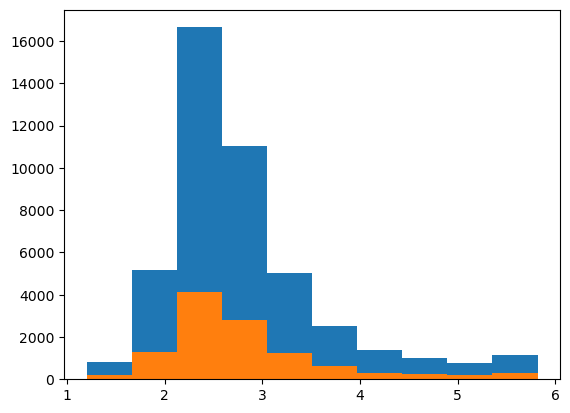

In [36]:
plt.hist(train_adscore_df["activity"])
plt.hist(val_adscore_df["activity"])

(array([ 213., 1303., 4119., 2794., 1256.,  623.,  307.,  229.,  215.,
         316.]),
 array([-1.84227139, -1.31234093, -0.78241047, -0.25248001,  0.27745044,
         0.8073809 ,  1.33731136,  1.86724182,  2.39717228,  2.92710274,
         3.45703319]),
 <BarContainer object of 10 artists>)

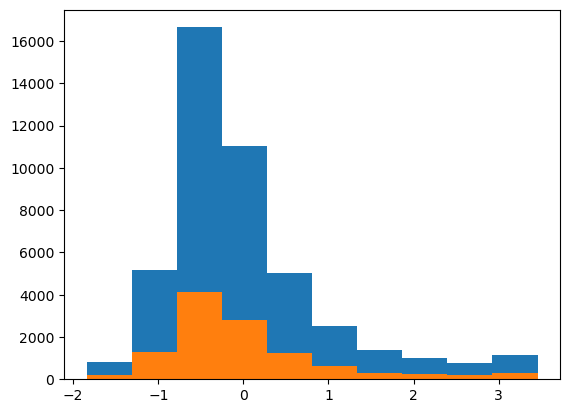

In [38]:
plt.hist(train_scalescore_df["activity"])
plt.hist(val_scalescore_df["activity"])